## Audio Deep Learning in Plain English
- So how do we feed an audio sample into a machine learning algorithm? You guessed right: we first convert it to an image. By visualizing an audio sample, we can loosely apply image processing techniques. At this point, we will take a useful detour to understand the intuition behind image classification using transformers.

### Image Processing
- Reading material to complete
    1. [read://https_medium.com/?url=https%3A%2F%2Fmedium.com%2F%40okezieowen%2Flets-build-a-mini-igbogpt-17e7290a368d](https://medium.com/@okezieowen/lets-build-a-mini-igbogpt-17e7290a368d)
    2. [read://https_medium.com/?url=https%3A%2F%2Fmedium.com%2F%40okezieowen%2Faudio-deep-learning-in-plain-english-b52843deb64e](https://medium.com/@okezieowen/audio-deep-learning-in-plain-english-b52843deb64e)
    3. [read://https_medium.com/?url=https%3A%2F%2Fmedium.com%2F%40ccibeekeoc42%2Fadvancing-multilingual-speech-recognition-fine-tuning-whisper-for-enhanced-low-resource-34529b525f90](https://medium.com/@ccibeekeoc42/advancing-multilingual-speech-recognition-fine-tuning-whisper-for-enhanced-low-resource-34529b525f90)

## 1. Reinforcement Learning Made Simple - Intro to Basic Concepts and Terminology

Now, starting with the first time-step, the following steps occur at each time-step:

1. The environment’s current state is input to the agent.
2. The agent uses that current state to decide what action it should take. It does not need a memory of the full history of states and actions that came before it. The agent decides to place its token in some position. There are many possible actions to choose from, so how does it decide what action to take? It’s a very important question but we’ll come to that later.
3. That action is passed as input to the environment.
4. The environment uses the current state and the selected action and outputs two things — it transitions the world to the next state, and it provides some reward. For instance, it takes the next move by placing its token in some position and provides us a reward. In this case, since no one has won the game yet, it provides a neutral reward of 0 points. How the environment does this is opaque to the agent, and not in our control.
5. This reward from the environment is then provided as feedback to the agent as a consequence of the previous action. This completes one time-step and moves us to the next time-step. This next state now becomes the current state which is then provided to the agent as input, and the cycle repeats.

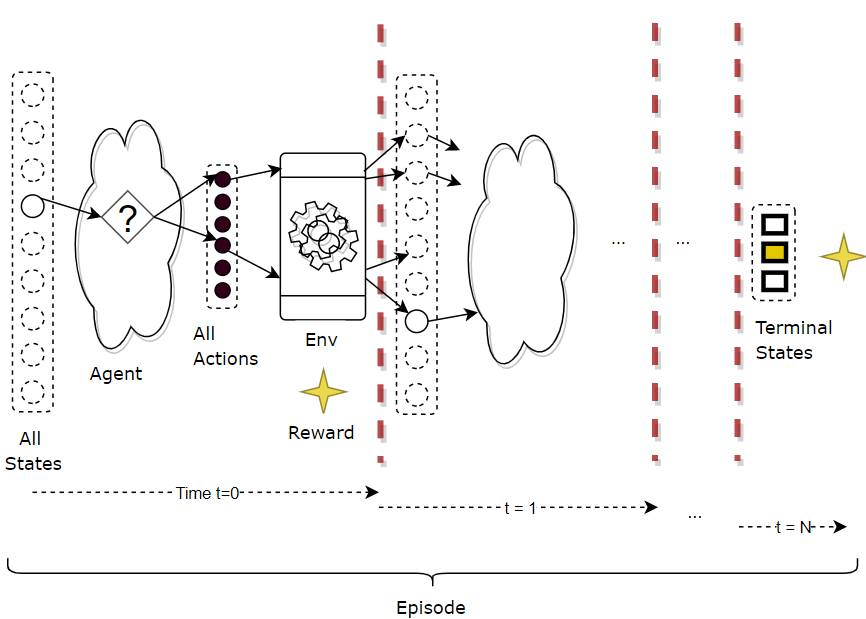

### How does the environment transition to the next state?
For most realistic RL problems that we will deal with, the answer will usually be that ‘it just does’. Most environments have complex internal dynamics that control how they behave when an action is taken from a particular state.

For instance, in a stock-trading RL application, the stock market environment has a range of unseen factors that determine how stock prices move. Or the environment in a drone navigation RL application depends on the laws of physics that control air flows, motion, thermodynamics, visibility and so on in a variety of terrains and micro-weather conditions.
- if we did build such an environment model, an MDP would represent it as a large transition probability matrix or function.

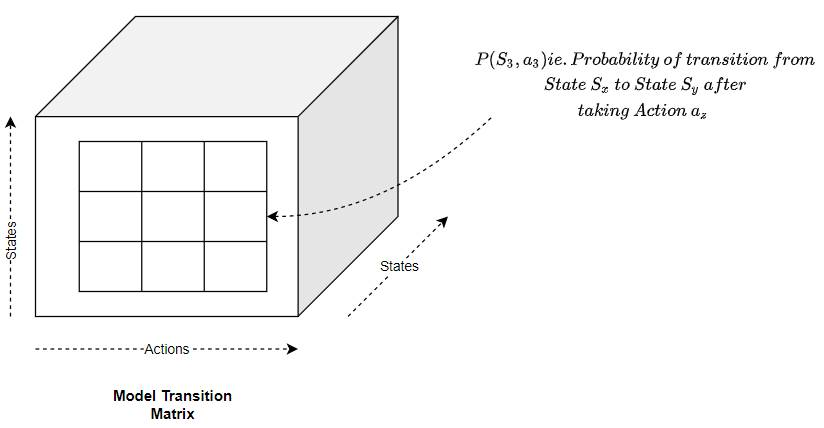

### How does the Agent pick the action?
- Return: The Return is the total reward over all time-steps -> Return is computed using Discounted Rewards -> Rewards that give us the highest Total Returns are better
- Policy: Policy is the strategy followed to pick an action -> Any strategy that the agent follows to decide which action to pick in a given state, is called a Policy. -> Policy is like a (huge) Lookup Table which maps a state to an action. the agent’s goal is to follow a Policy (which is how it picks its actions) that maximizes its Return.

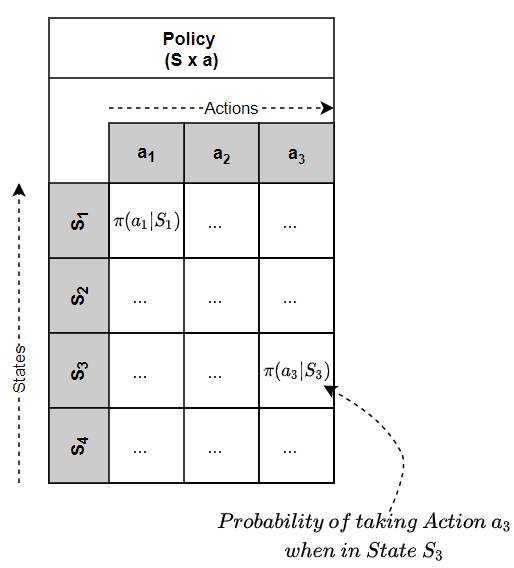

1. Deterministic: A Deterministic Policy is a Policy where the agent always chooses the same fixed action when it reaches a particular state.
2. Stochastic Policies: Stochastic Policy is a Policy where the agent varies the actions it chooses for a state, based on some probability for each action.
- Value: The Value tells you the expected Return by following some Policy
1. State Value — the expected Return from a given state, by executing actions based on a given policy π from that state onward. In other words, the State Value function maps a State to its Value.
2. State-Action Value (aka Q-Value) — the expected Return by taking a given action from a given state, and then, by executing actions based on a given policy π after that. In other words, the State-Action Value function maps a State-Action pair to its Value.

### Use the Value Function to compare Policies
Given two policies, we can determine the corresponding State-Value or State-Action Value functions for each of those policies, by following the policy and evaluating the Returns.

### RL Solution Categories
‘Solving’ a Reinforcement Learning problem basically amounts to finding the Optimal Policy (or Optimal Value). There are many algorithms, which we can group into different categories.
1. Model-based (aka Planning) -> Model-based approaches are used when the internal operation of the environment is known. In other words, we can reliably say what Next State and Reward will be output by the environment when some Action is performed from some Current State.

2. Model-free (aka Reinforcement Learning) -> Model-free approaches are used when the environment is very complex and its internal dynamics are not known. They treat the environment as a black-box.

Most practical problems are Control problems, as our goal is to find the Optimal Policy.

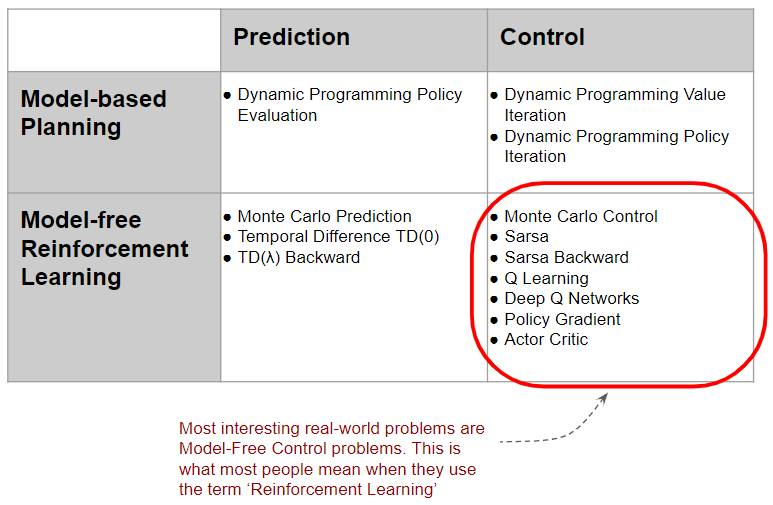

#### Model-based Approaches
Because they can produce the exact outcome of every state and action interaction, model-based approaches can find a solution analytically without actually interacting with the environment.

As an example, with a model-based approach to play chess, you would program in all the rules and strategies of the game of chess.

#### Model-free Approaches
Model-free solutions, by contrast, are able to observe the environment’s behavior only by actually interacting with it. Since the internal operation of the environment is invisible to us, how does the model-free algorithm observe the environment’s behavior?

We learn how it behaves by interacting with it, one action at a time. The algorithm acts as the agent, takes an action, observes the next state and reward, and repeats.

As the agent takes each step, it follows a path (ie. trajectory).

The agent’s trajectory becomes the algorithm’s ‘training data’.

### The Bellman Equation is the foundation for all RL algorithms
#### Work back from a Terminal State (makes it easier to understand)
The return from that state is the same as the reward obtained by taking that action. Remember that Reward is obtained for a single action, while Return is the cumulative discounted reward obtained from that state onward (till the end of the episode).

Now consider the previous state S6. The return from S6 is the reward obtained by taking the action to reach S7 plus any discounted return that we would obtain from S7. The important thing is that we no longer need to know the details of the individual steps taken beyond S7.

#### Bellman Equation for State Value
So State Value can be similarly decomposed into two parts — the immediate reward from the next action to reach the next state, plus the Discounted Value of that next state by following the policy for all subsequent steps.

#### Bellman Equation for State-Action Value

Similarly, the State-Action Value can be decomposed into two parts — the immediate reward from that action to reach the next state, plus the Discounted Value of that next state by following the policy for all subsequent steps.

#### Why is the Bellman Equation useful?
1. Return can be computed recursively without going to the end of the episode
2. We can work with estimates, rather than exact values

### Model-free algorithms can be Policy-based or Value-based
#### Use the Value function to compare two policies
every policy has two corresponding value functions, the State Value (or V-value), and the State-Action Value (or Q-value)

### Model-free Algorithm Categories
Simpler algorithms implement the Policy or Value as a Lookup Table, while the more advanced algorithms implement a Policy or Value function, using a Function Approximator like a Neural Network.

#### Model-free algorithms use an iterative solution
- All of these algorithms can be boiled down to a few essential principles that all of them employ.
- They start with arbitrary estimates of the quantity they want to find, and then incrementally improve those estimates by getting data from the environment.

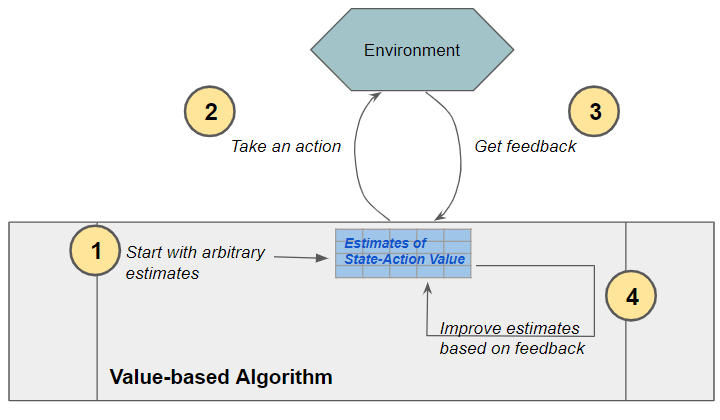

1. Initialize estimates
The first step is the Initialization of our estimates. A Value-based algorithm uses an estimated Optimal State-Action Value table, while a Policy-based algorithm uses an estimated Optimal Policy table with probabilities for each action in each state. In the beginning, since it has no idea what the right values are, it simply initializes everything to zero.
2. Take an action
Next, the agent needs to pick an action to perform from the current state.

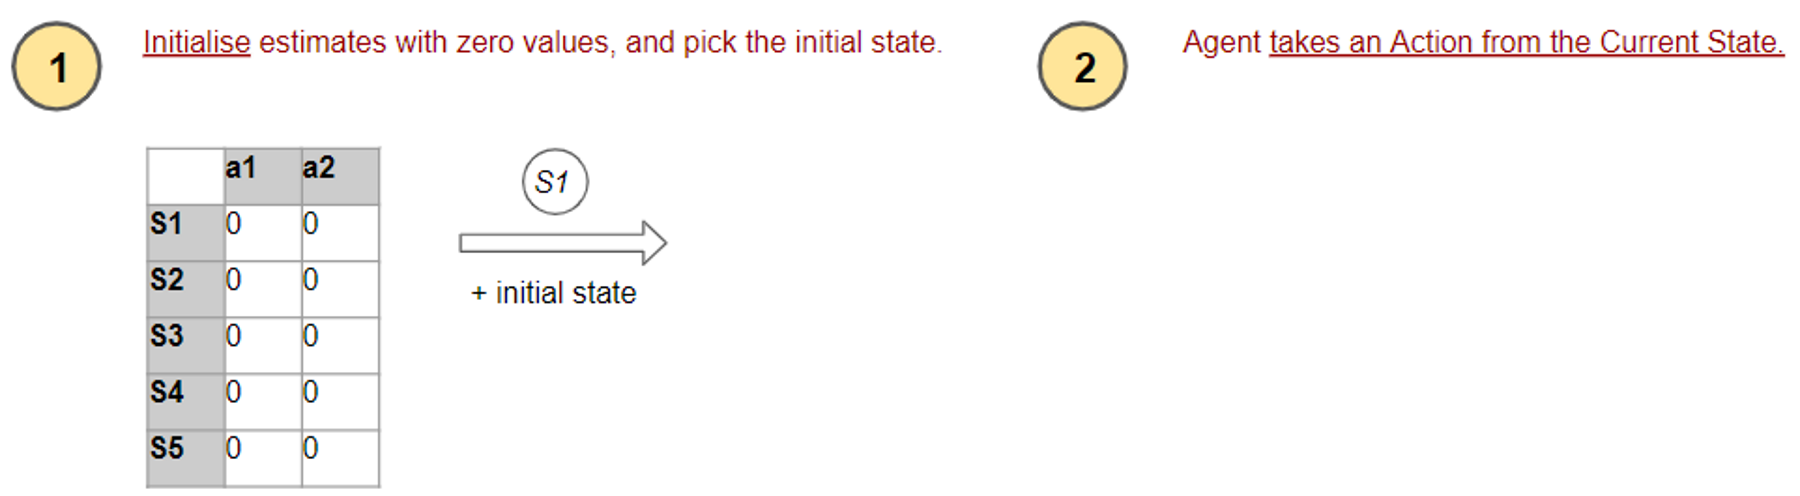

- Exploration vs Exploitation
Exploration — when we first start learning, we have no idea which actions are ‘good’ and which are ‘bad. So we go through a process of discovery where we randomly try different actions and observe the rewards.

Exploitation — on the other end of the spectrum, when the model is fully trained, we have already explored all possible actions, so we can pick the best actions which will yield the maximum return

#### Policy-based uses its own estimates to pick an action
A Policy-based agent’s Policy Table already has an ongoing estimate of the optimal policy, which tells you the desired probability of all the actions you can take from any given state. So it just picks an action based on the probabilities of that estimated optimal policy. The higher the probability of an action, the more likely it is to get picked.

#### Value-based uses an ε-greedy strategy to pick an action
A Value-based agent adopts a dynamic strategy known as ε-Greedy. It uses an exploration rate ε which it adjusts as training progresses to ensure more exploration in the early stages of training and shifts towards more exploitation in the later stages.
- Now, whenever it picks an action in every state, it selects a random action (ie. explores) with probability ε. Since ε is higher in the early stages, the agent is more likely to explore.
- And similarly, with probability ‘1 — ε’, it selects the best action (ie. exploit). As ε goes down, the likelihood of exploration becomes less and the agent becomes ‘greedy’ by exploiting the environment more and more.

3. Get feedback from the environment
The agent takes the action it has selected and obtains feedback from the environment.

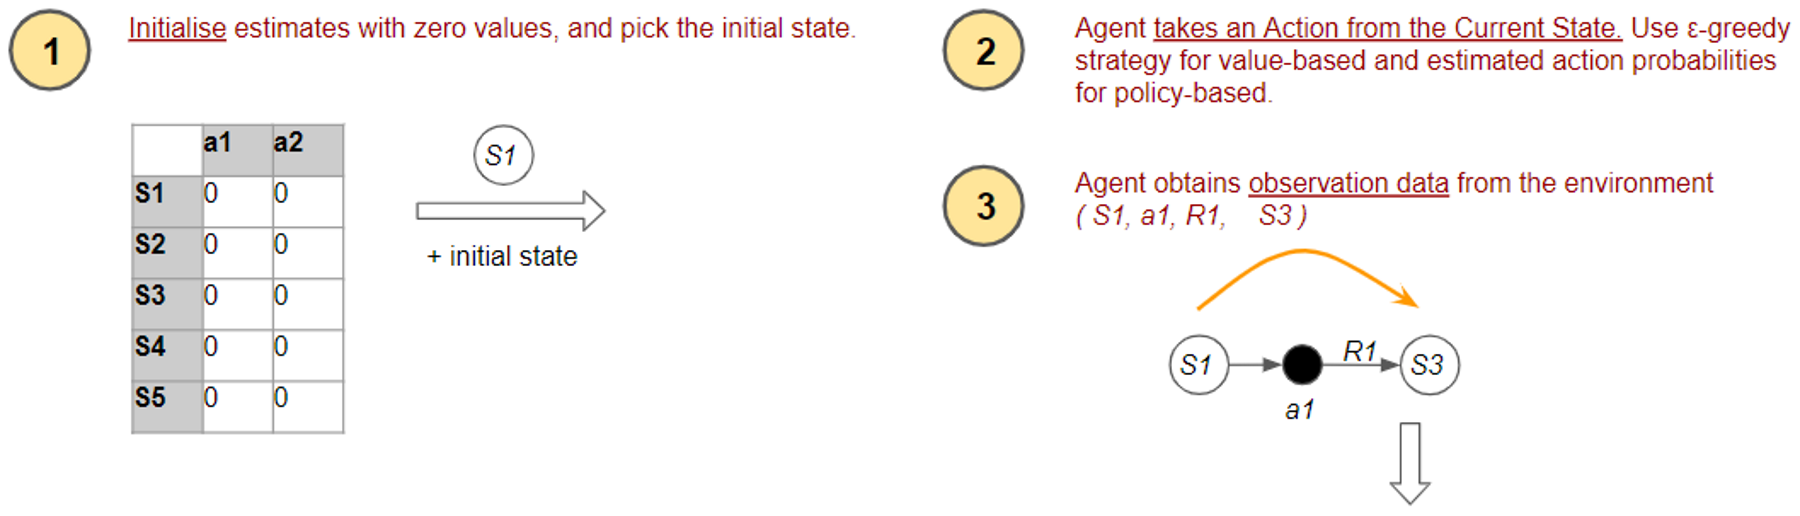

The agent receives feedback from the environment in the form of a reward.

4. Improve estimates
A Policy-based agent uses that feedback to improve its estimated Optimal Policy based on that reward. A Value-based agent uses that feedback to improve its estimated Optimal Value based on that reward. That way, the next time they have to decide which action to take from that state, that decision will be based on more accurate estimates.

    - Policy-based updates the probability of the action: The agent says ‘If I got a positive reward, then I will update my Policy table to increase the probability of the action I just took. That way, the next time I will be more likely to take that action’
    - Value-based updates its value based on the Bellman Equation: A Value-based agent says ‘My previous estimate told me to expect this much Value from this action. Based on the reward I just got, the Bellman Equation tells me that my Value should be higher (or lower). I will update my Value table to reduce that gap. The second important insight is that the Bellman Equation says that there are two ways to compute the State-Action Value: 1. One way is the State-Action Value from the Current State
    2. The other way is the immediate reward from taking one step plus the State-Action Value from the Next State.

5. Putting it all together
The agent now has improved estimates. This completes the flow for the four operations. The algorithm continues doing this flow till the end of the episode. Then it restarts a new episode and repeats.

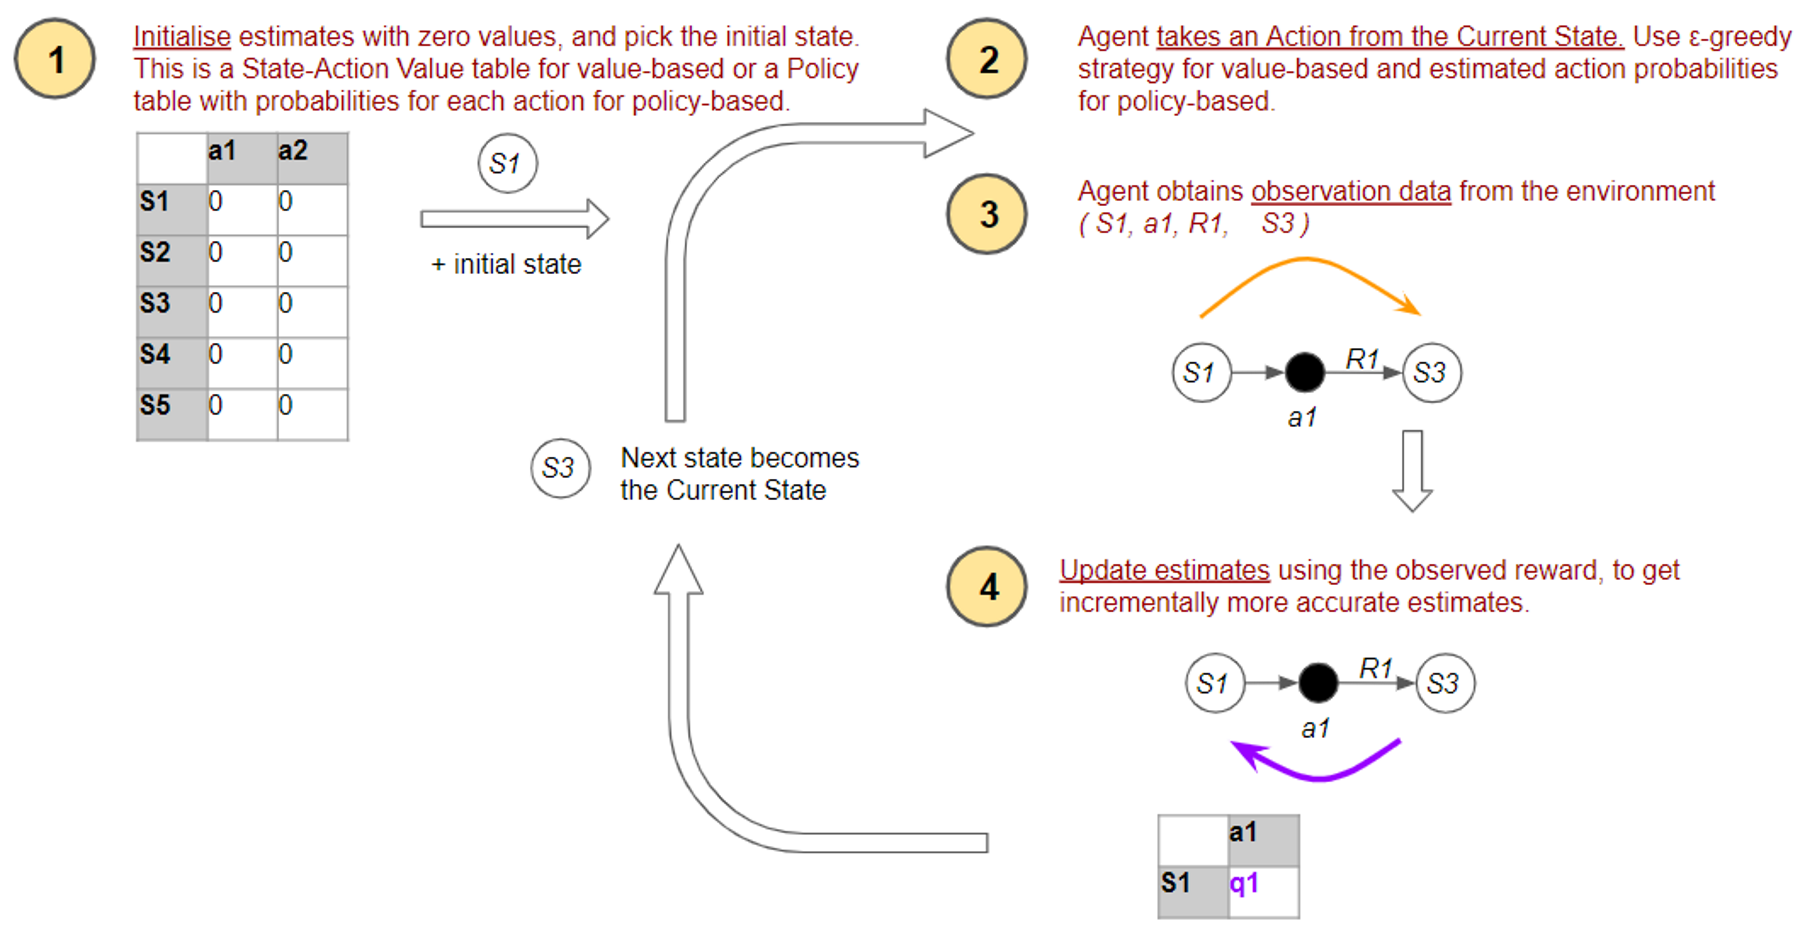

#### Different Ways to Improve Estimates
- Frequency — the number of forward steps taken before an update.
- Depth — the number of backward steps to propagate an update.
- Formula that is used to compute the updated estimate.

##### Frequency
There are three options for the number of forward steps the agent can take before updating our estimates:
        - Episode — The simplest idea is that it takes an action, observes rewards, saves them, then takes another action, observes those rewards and saves them, and keeps doing that till the end of the episode. Finally, at the end of the episode, the algorithm takes all those rewards and uses them to update our estimates.
        - One Step — Alternately, rather than waiting till we go all the way to the end of the episode, we could take just one step, observe those rewards and do the update right away.
        - N Steps — The above two options are the two ends of the spectrum. In between, we could do the update after N steps.

##### Depth
After taking some forward steps, the next question is how far back should the algorithm propagate its update estimates? Again, there are three options:
        - Episode — If the agent took forward steps till the end of the episode, the algorithm could update the estimates for every state-action pair that it took along the way.
        - One Step — Alternately, it could update the estimates for only the current state-action pair.
        - N Steps — The above two options are the two ends of the spectrum. In between, we could update N steps along the way.

##### Update Formula
        - The formula used to update the estimates has many variations eg: Value-based updates use some flavor of the Bellman Equation to update the Q-value with an ‘error’ value. For example, this formula incrementally updates the Q-value estimate with an error value known as the TD Error.
        - Policy-based updates increase or decrease the probability of the action that the agent took, based on whether we received a good reward or not.

#### Relationship between Model-free Algorithms

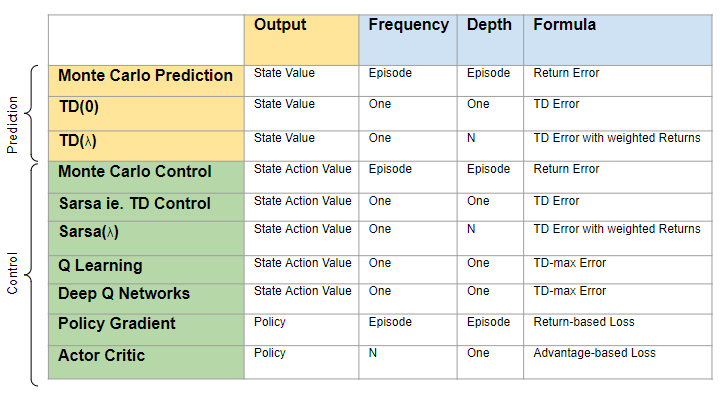


### Q Learning Overview
The Q-learning algorithm uses a Q-table of State-Action Values (also called Q-values). This Q-table has a row for each state and a column for each action. Each cell contains the estimated Q-value for the corresponding state-action pair.
We start by initializing all the Q-values to zero. As the agent interacts with the environment and gets feedback, the algorithm iteratively improves these Q-values until they converge to the Optimal Q-values. It updates them using the Bellman equation.

#### How do we construct a Q-table?
Let’s take a simple game as an example. Consider a 3x3 grid, where the player starts in the Start square and wants to reach the Goal square as their final destination, where they get a reward of 5 points. Some squares are Clear while some contain Danger, with rewards of 0 points and -10 points respectively. In any square, the player can take four possible actions to move Left, Right, Up, or Down.

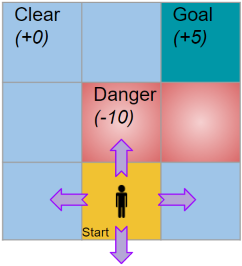

This problem has 9 states since the player can be positioned in any of the 9 squares of the grid. It has 4 actions. So we construct a Q-table with 9 rows and 4 columns.

Now we can use the Q-table to lookup the Q-value for any state-action pair. eg. The value in a particular cell, say ((2, 2), Up) is the Q-value (or State-Action value) for the state (2, 2) and action ‘Up’.

#### Q Learning Algorithm

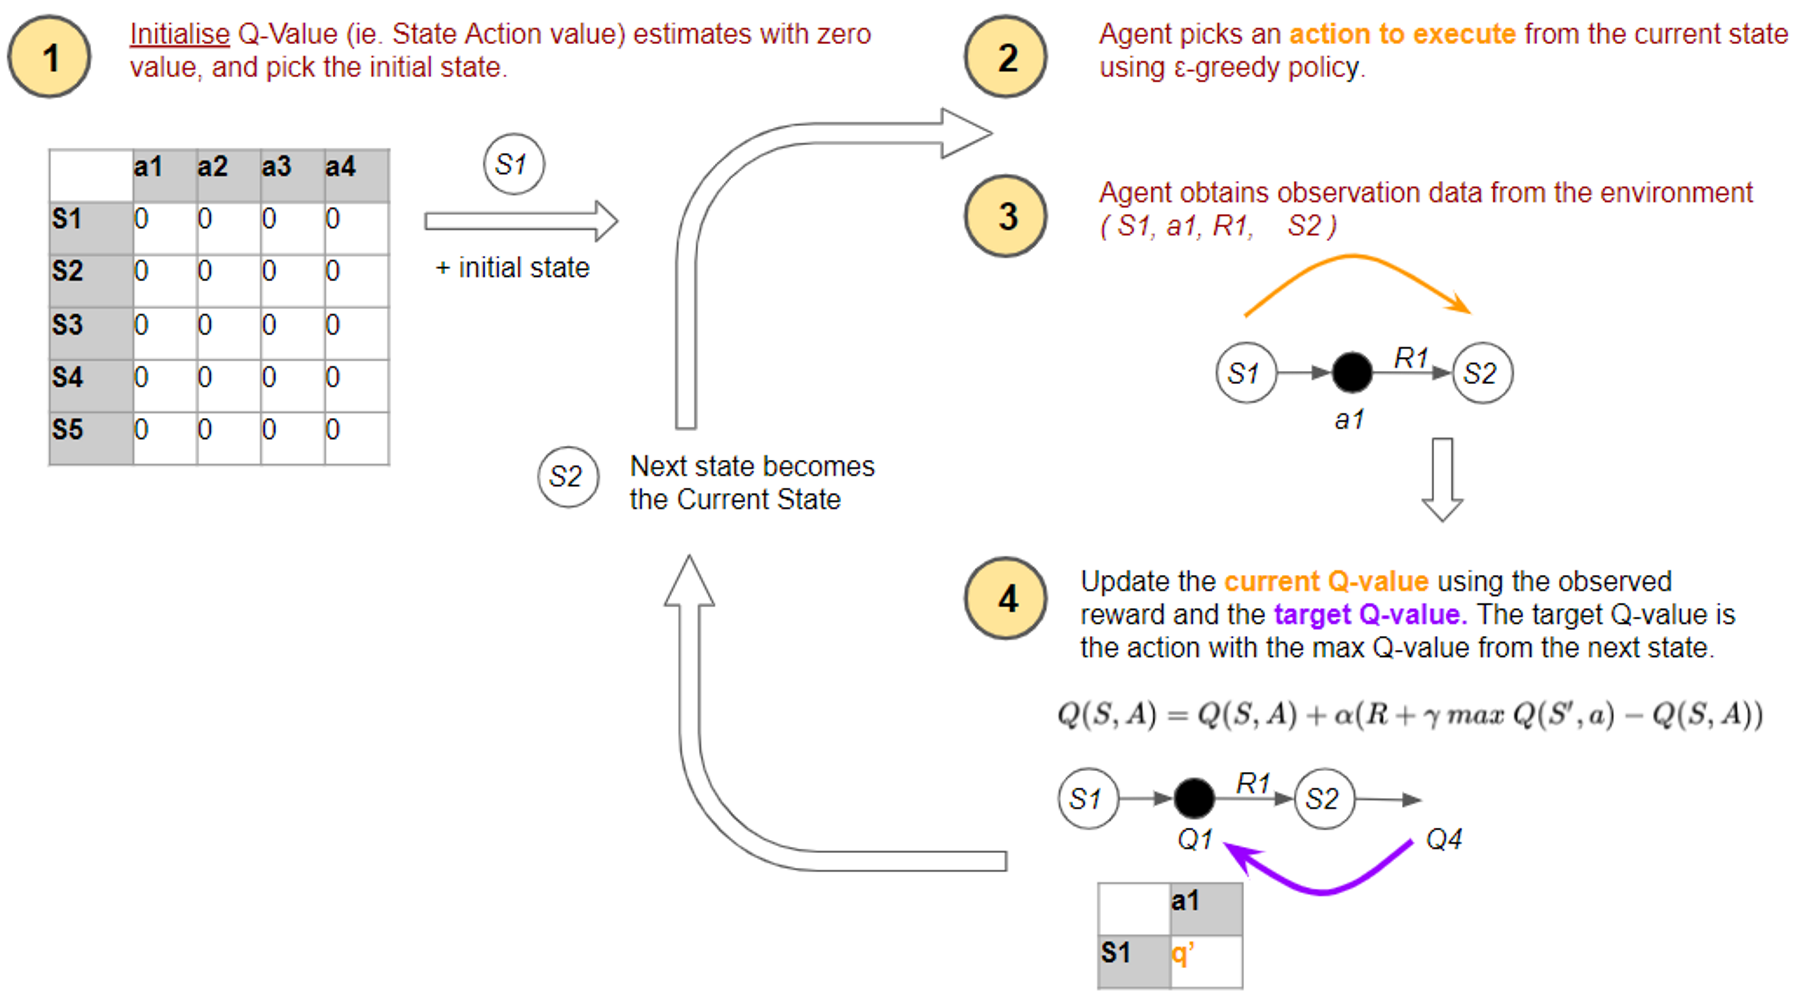

##### Q Learning uses two different actions in each time-step
1. the agent uses the ε-greedy policy to pick the current action (a1) from the current state (S1). This is the action that it passes to the environment to execute, and gets feedback in the form of a reward (R1) and the next state (S2).
2. Now, for step #4, the algorithm has to use a Q-value from the next state in order to update its estimated Q-value (Q1) for the current state and selected action. And here is where the Q-Learning algorithm uses its clever trick. The next state has several actions, so which Q-value does it use? It uses the action (a4) from the next state which has the highest Q-value (Q4). What is critical to note is that it treats this action as a target action to be used only for the update to Q1. It is not necessarily the action that it will actually end up executing from the next state when it reaches the next time step.
In other words, there are two actions involved:
    - Current action — the action from the current state that is actually executed in the environment, and whose Q-value is updated.
    - Target action — has the highest Q-value from the next state, and used to update the current action’s Q value.

This duality of actions is what makes Q-Learning unique.
We can explore and discover new paths for actions that we execute.
However, when we update Q-value estimates to improve them, we always use the best Q-value, even though that action may not get executed.

This might sound confusing, so let’s move forward to the next time-step to see what happens. Now the next state has become the new current state.
The agent again uses the ε-greedy policy to pick an action. If it ends up exploring rather than exploiting, the action that it executes (a2) will be different from the target action (a4) used for the Q-value update in the previous time-step.

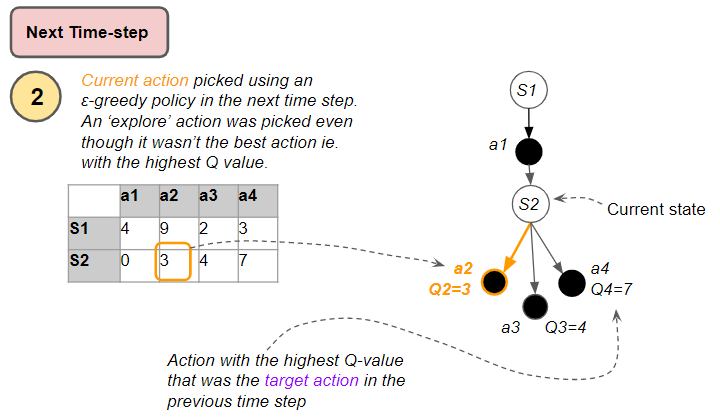

This is known as ‘off-policy’ learning because the actions that are executed are different from the target actions that are used for learning.

### How does the Q-table get populated?
At the start of the game, the agent doesn’t know which action is better than any other action. So we start by giving all Q-values arbitrary estimates and set all entries in the Q-table to 0.
Let’s see an example of what happens in the first time-step so we can visualize how the Q-table gets populated with actual values.
The algorithm then picks an ε-greedy action, gets feedback from the environment, and uses the formula to update the Q-value, as below. This new Q-value reflects the reward that we observed.

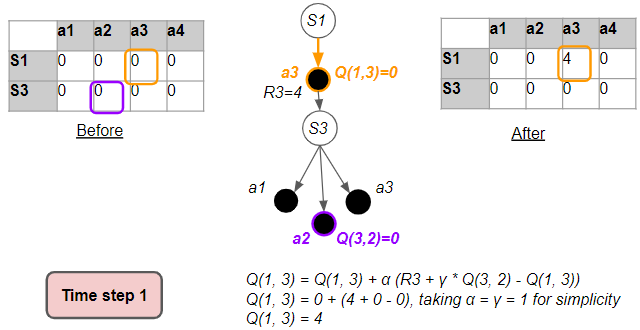

In this way, one cell of the Q-table has gone from zero values to being populated with some real data from the environment.

### Why do estimates become more accurate over time? (part 1)
The update formula combines three terms in some weighted proportion:

- The reward for the current action
- Best Estimated Q-value of the next state-action
- Estimated Q-value of the current state-action

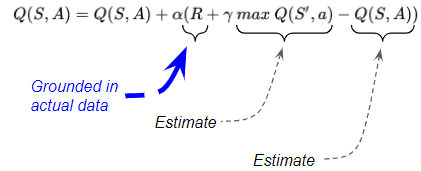

### The Q-value gets updated with real rewards
As the agent follows various paths and starts to visit state-action pairs, those cells which were previously zeros have been populated.

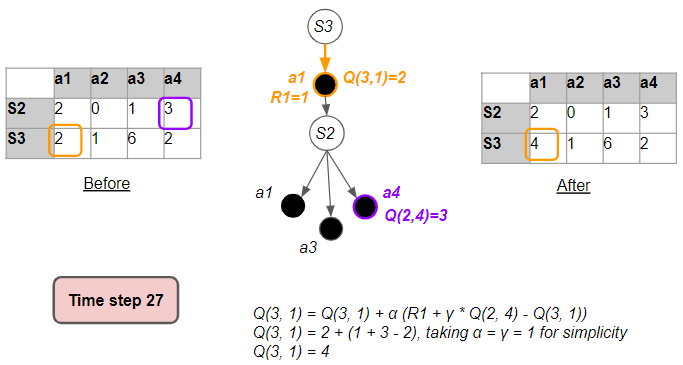

Let’s visit that cell a third time. By the way, notice that the target action (in purple) need not be the same in each of our three visits.
Let’s layout all our visits to that same cell in a single picture to visualize the progression over time. As we visit that same state-action pair more and more times over many episodes, we collect rewards each time. An individual reward observation might fluctuate, but over time, the rewards will converge towards their expected values. This allows the Q-value to also converge over time.

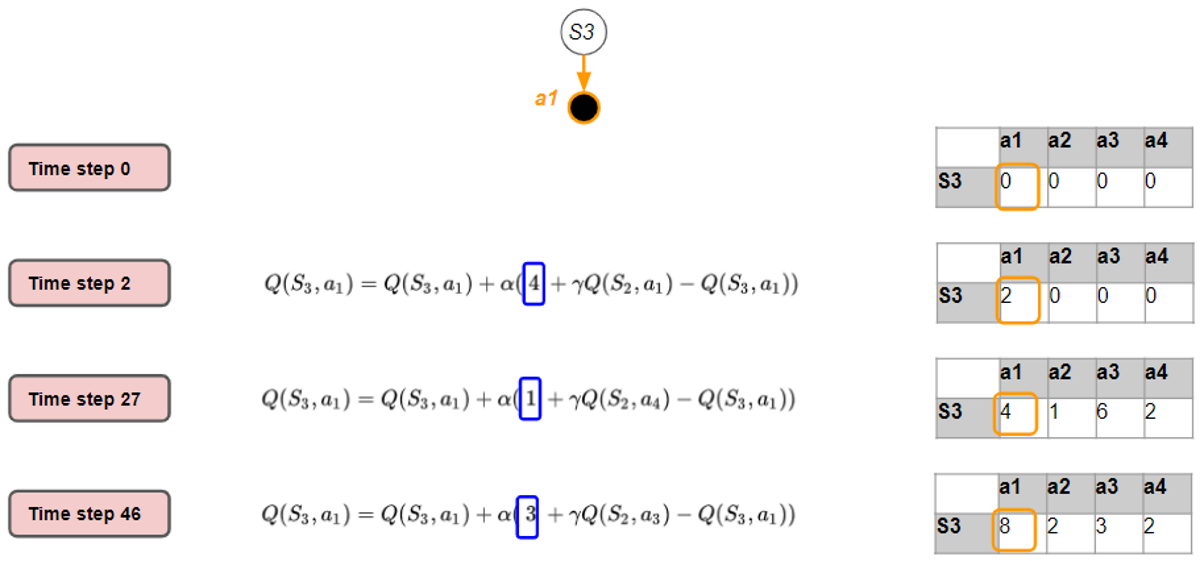

### Why do estimates become more accurate over time? (part 2)

But what about the other two terms in the update formula which were Estimates and not actual data? Although they start out being very inaccurate, they also do get updated with real observations over time, improving their accuracy.
Let’s say that towards the end of Episode 1, in the (T — 1)ˢᵗ time-step, the agent picks an action as below. The Before-Terminal Q-value is updated based on the target action.

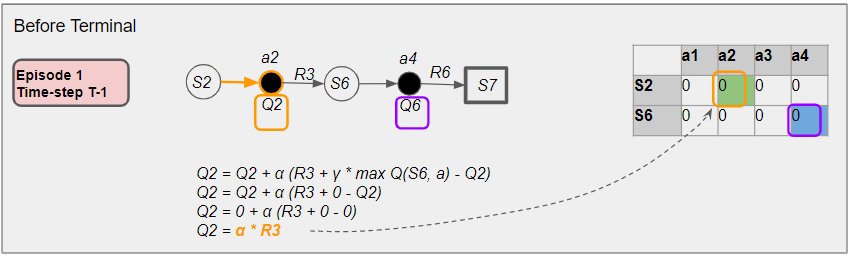

The next time-step is the last one of Episode 1. Here in the Tᵗʰ time-step, the agent picks an action to reach the next state which is a Terminal state.

Since the next state is Terminal, there is no target action. So the ‘max’ term in the update formula is 0. This means that the update to the Terminal Q-value is based solely on the actual reward data, and it does not rely on any estimated values. That causes the accuracy of the Terminal Q-value to improve. This ends the episode.

Let’s lay out these three time-steps in a single picture to visualize the progression over time. We have seen that the Terminal Q-value (blue cell) got updated with actual data and not an estimate. We have also seen that this Terminal Q-value trickles back to the Before-Terminal Q-value (green cell).

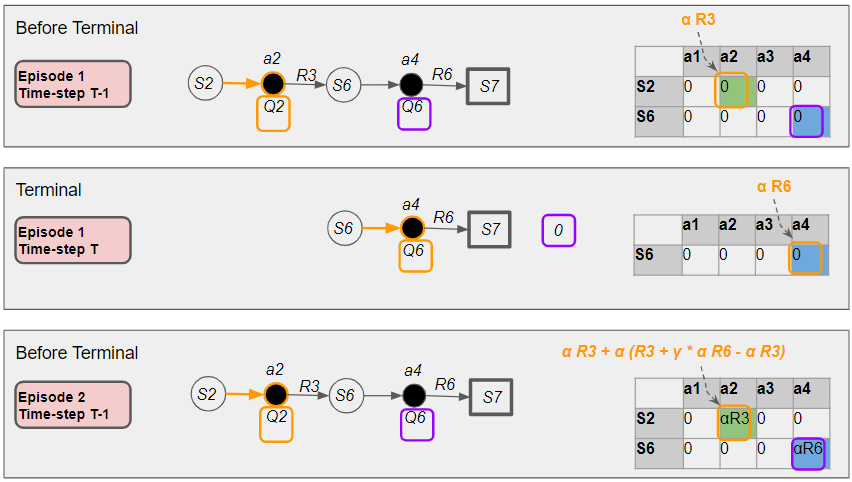

#### Q-table estimates become more accurate as more episodes are run

As we do more and more iterations, more accurate Q-values slowly get transmitted to cells further up the path. And as each cell receives more updates, that cell’s Q value becomes more and more accurate.

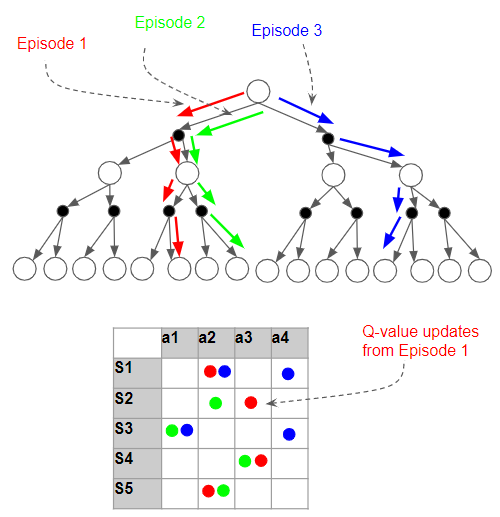

#### Q-values converge to Optimal Values

These are the two reasons why the ε-greedy policy algorithm eventually does find the Optimal Q-values. We have seen these informally but we can take comfort from the fact that more formal mathematical proofs do exist! 😄

With each iteration, the Q-values get better
If you do enough iterations, you will have evaluated all the possible options, and there will be no better Q-values that you can find.
The Q-values incrementally become more accurate with each update, moving closer and closer to the optimal values.





### Overview of Deep Q Networks
Q Learning builds a Q-table of State-Action values, with dimension (s, a), where s is the number of states and a is the number of actions. Fundamentally, a Q-table maps state and action pairs to a Q-value.
#### Use a Q-Function for real-world problems
To address this limitation we use a Q-function rather than a Q-table, which achieves the same result of mapping state and action pairs to a Q value.
A state-action function is required to handle real-world scenarios with a large state space. (Image by Author)
`Neural Nets are the best Function Approximators`
Since neural networks are excellent at modeling complex functions, we can use a neural network, which we call a Deep Q Network, to estimate this Q function.
This function maps a state to the Q values of all the actions that can be taken from that state.

It learns the network’s parameters (weights) such that it can output the Optimal Q values.

The underlying principle of a Deep Q Network is very similar to the Q Learning algorithm. It starts with arbitrary Q-value estimates and explores the environment using the ε-greedy policy. And at its core, it uses the same notion of dual actions, a current action with a current Q-value and a target action with a target Q-value, for its update logic to improve its Q-value estimates.

#### DQN Architecture Components
The DQN architecture has two neural nets, the Q network and the Target networks, and a component called Experience Replay. The Q network is the agent that is trained to produce the Optimal State-Action value.

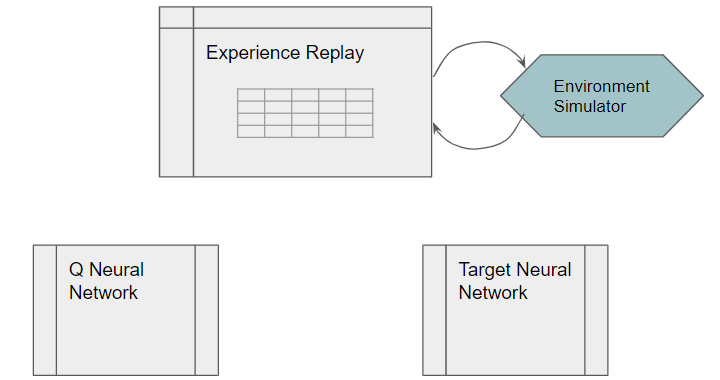

#### High-level DQN Workflow
The DQN gets trained over multiple time steps over many episodes. It goes through a sequence of operations in each time step:

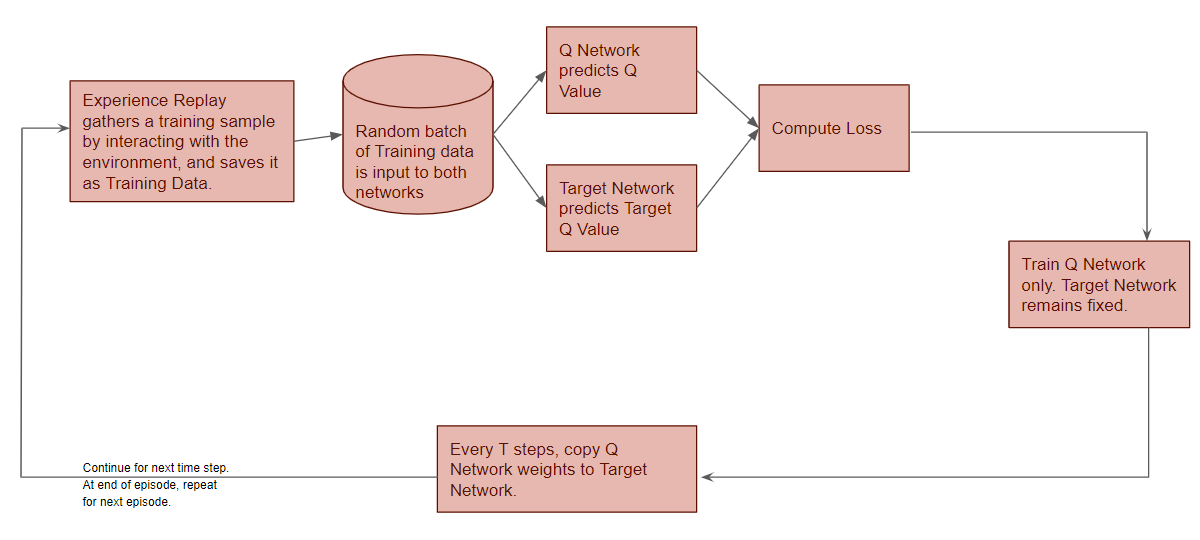

2. Q Network predicts Q-value
All prior Experience Replay observations are saved as training data. We now take a random batch of samples from this training data, so that it contains a mix of older and more recent samples.

This batch of training data is then inputted to both networks. The Q network takes the current state and action from each data sample and predicts the Q value for that particular action. This is the ‘Predicted Q Value’.
3. Target Network predicts Target Q-value
The Target network takes the next state from each data sample and predicts the best Q value out of all actions that can be taken from that state. This is the ‘Target Q Value’.
4. Compute Loss and Train Q Network
The Predicted Q Value, Target Q Value, and the observed reward from the data sample is used to compute the Loss to train the Q Network. The Target Network is not trained.

#### Why do we need Experience Replay?
Sequential actions are highly correlated with one another and are not randomly shuffled, as the network would prefer. This results in a problem called Catastrophic Forgetting where the network unlearns things that it had learned a short while earlier.
This is why the Experience Replay memory was introduced. All of the actions and observations that the agent has taken from the beginning (limited by the capacity of the memory, of course) are stored. Then a batch of samples is randomly selected from this memory. This ensures that the batch is ‘shuffled’ and contains enough diversity from older and newer samples (eg. from several regions of the factory floor and under different conditions) to allow the network to learn weights that generalize to all the scenarios that it will be required to handle.

#### Why do we need a second neural network (Target Network)?
But that could create a potential problem. The Q Network’s weights get updated at each time step, which improves the prediction of the Predicted Q value. However, since the network and its weights are the same, it also changes the direction of our predicted Target Q values. They do not remain steady but can fluctuate after each update. This is like chasing a moving target 😄.
By employing a second network that doesn’t get trained, we ensure that the Target Q values remain stable, at least for a short period. But those Target Q values are also predictions after all and we do want them to improve, so a compromise is made. After a pre-configured number of time-steps, the learned weights from the Q Network are copied over to the Target Network.

It has been found that using a Target Network results in more stable training.

#### DQN Operation in depth
- Execute a few actions with the environment to bootstrap the replay data.
- Initialize the Q Network with random weights and copy them to the Target Network.
1. Experience Replay
Starting with the first time step, the Experience Replay starts the training data generation phase and uses the Q Network to select an ε-greedy action. The Q Network acts as the agent while interacting with the environment to generate a training sample. No DQN training happens during this phase.

The Q Network predicts the Q-values of all actions that can be taken from the current state. We use those Q-values to select an ε-greedy action.
2. The sample data (Current state, action, reward, next state) is saved
3. Select random training batch
4. Use the current state from the sample as input to predict the Q values for all actions
5. Select the Predicted Q-value: From the output Q values, select the one for the sample action. This is the Predicted Q Value.

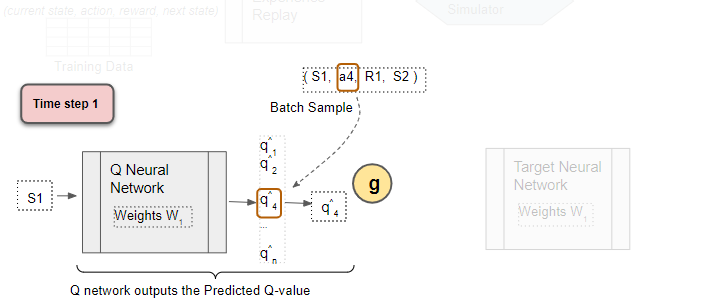

6. Use the next state from the sample as input to the Target network
The next state from the sample is input to the Target network. The Target network predicts Q values for all actions that can be taken from the next state, and selects the maximum of those Q values.
7. Use the next state as input to predict the Q values for all actions. The target network selects the max of all those Q-values.

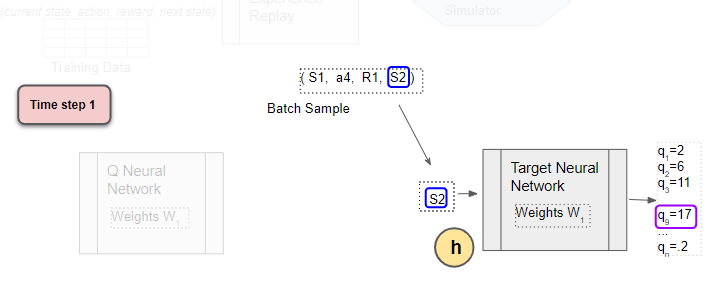

8. Get the Target Q Value
The Target Q Value is the output of the Target Network plus the reward from the sample.

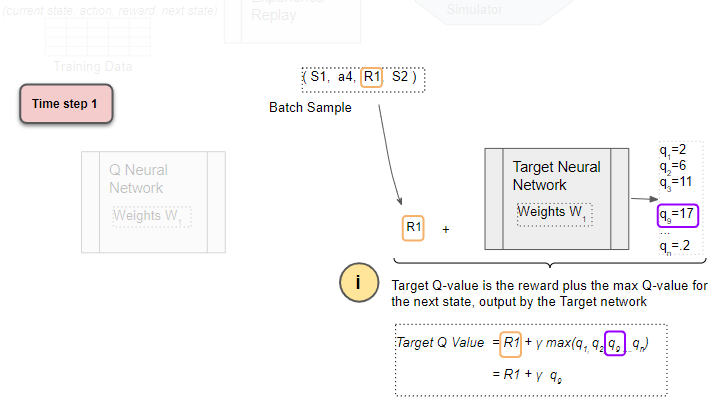

9. Compute loss
Compute the Mean Squared Error loss using the difference between the Target Q Value and the Predicted Q Value.

10. Back-propagate Loss to Q-Network
Back-propagate the loss and update the weights of the Q Network using gradient descent. The Target network is not trained and remains fixed, so no Loss is computed, and back-propagation is not done. This completes the processing for this time-step.

11. No Loss for Target Network
12. Repeat for next time-step
13. The processing repeats for the next time-step. 
The Q network weights have been updated but not the Target network’s. This allows the Q network to learn to predict more accurate Q values, while the target Q values remain fixed for a while, so we are not chasing a moving target.
14. After T time-steps, copy Q Network weights to Target Network
After T time-steps, copy the Q network weights to the Target network. This lets the Target network get the improved weights so that it can also predict more accurate Q values. Processing continues as before.

## Transformers Explained Visually - Overview of Functionality

#### Matrix Dimensions
As we know, deep learning models process a batch of training samples at a time. The Embedding and Position Encoding layers operate on matrices representing a batch of sequence samples. The Embedding takes a (samples, sequence length) shaped matrix of word IDs. It encodes each word ID into a word vector whose length is the embedding size, resulting in a (samples, sequence length, embedding size) shaped output matrix. The Position Encoding uses an encoding size that is equal to the embedding size. So it produces a similarly shaped matrix that can be added to the embedding matrix.

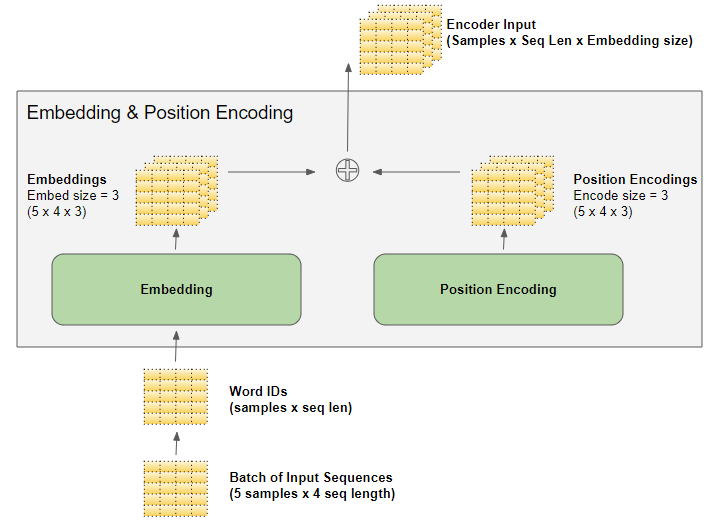

- The (samples, sequence length, embedding size) shape produced by the Embedding and Position Encoding layers is preserved all through the Transformer, as the data flows through the Encoder and Decoder Stacks until it is reshaped by the final Output layers.

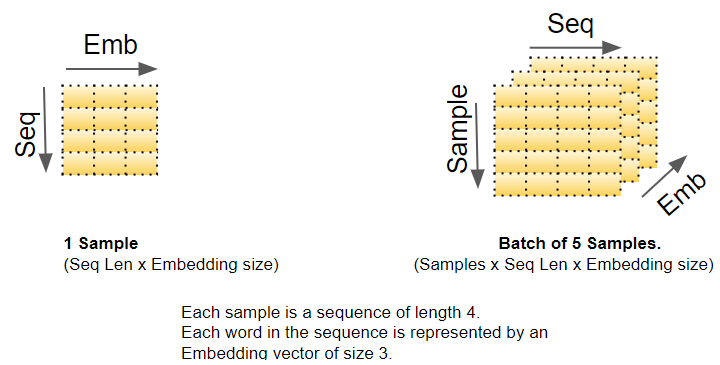

#### Encoder
The first Encoder in the stack receives its input from the Embedding and Position Encoding. The other Encoders in the stack receive their input from the previous Encoder.

The Encoder passes its input into a Multi-head Self-attention layer. The Self-attention output is passed into a Feed-forward layer, which then sends its output upwards to the next Encoder.

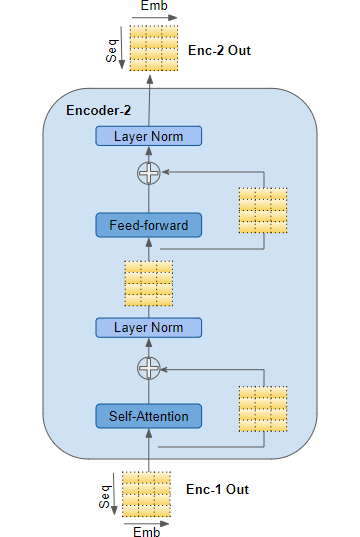

#### Decoder
The Decoder’s structure is very similar to the Encoder’s but with a couple of differences.

Like the Encoder, the first Decoder in the stack receives its input from the Output Embedding and Position Encoding. The other Decoders in the stack receive their input from the previous Decoder.

The Decoder passes its input into a Multi-head Self-attention layer. This operates in a slightly different way than the one in the Encoder. It is only allowed to attend to earlier positions in the sequence. This is done by masking future positions, which we’ll talk about shortly.

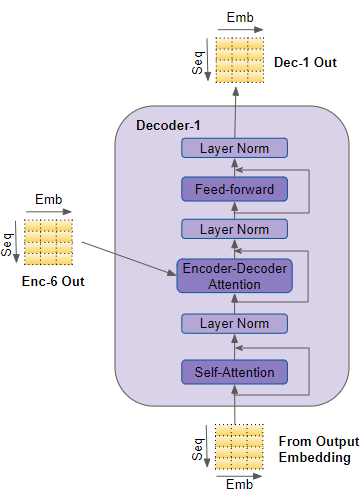

Unlike the Encoder, the Decoder has a second Multi-head attention layer, known as the Encoder-Decoder attention layer. The Encoder-Decoder attention layer works like Self-attention, except that it combines two sources of inputs — the Self-attention layer below it as well as the output of the Encoder stack.
Each of these sub-layers, Self-attention, Encoder-Decoder attention, and Feed-forward, have a residual skip-connection around them, followed by a Layer-Normalization.

#### Attention
In the Transformer, Attention is used in three places:

- Self-attention in the Encoder — the input sequence pays attention to itself
- Self-attention in the Decoder — the target sequence pays attention to itself
- Encoder-Decoder-attention in the Decoder — the target sequence pays attention to the input sequence
The Attention layer takes its input in the form of three parameters, known as the Query, Key, and Value.

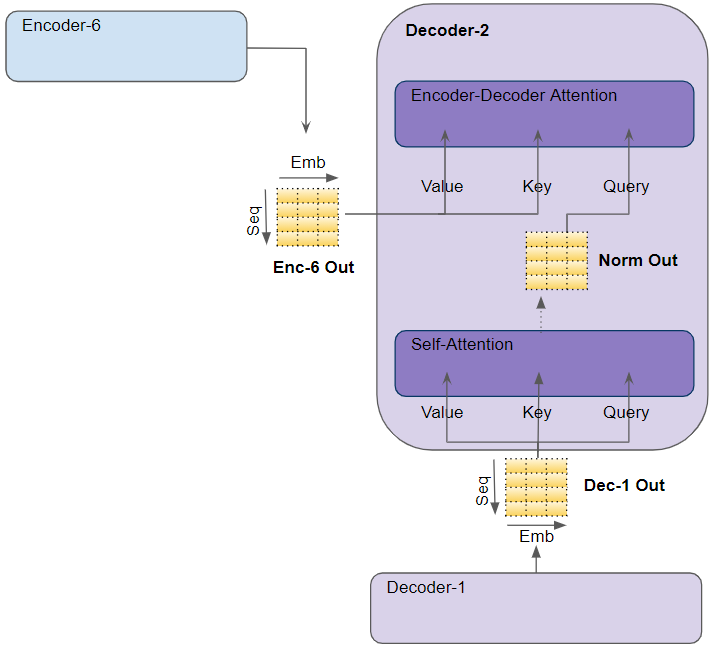

#### Multi-head Attention
The Transformer calls each Attention processor an Attention Head and repeats it several times in parallel. This is known as Multi-head attention. It gives its Attention greater power of discrimination, by combining several similar Attention calculations.

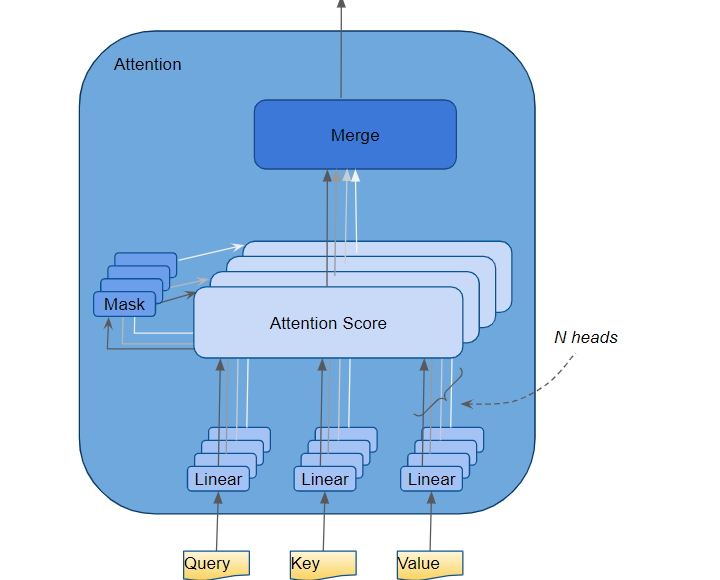

The Query, Key, and Value are each passed through separate Linear layers, each with their own weights, producing three results called Q, K, and V respectively. These are then combined together using the Attention formula as shown below, to produce the Attention Score.

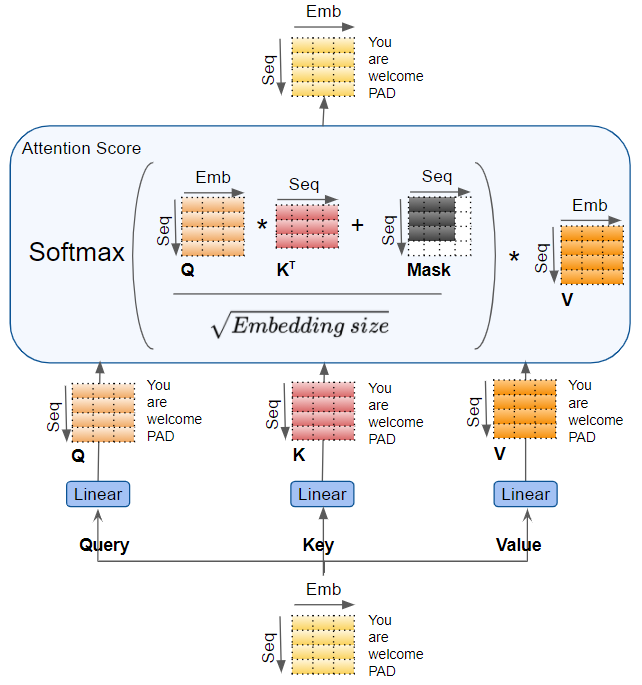

#### Attention Masks
##### In the Encoder Self-attention and in the Encoder-Decoder-attention
masking serves to zero attention outputs where there is padding in the input sentences, to ensure that padding doesn’t contribute to the self-attention. (Note: since input sequences could be of different lengths they are extended with padding tokens like in most NLP applications so that fixed-length vectors can be input to the Transformer.)

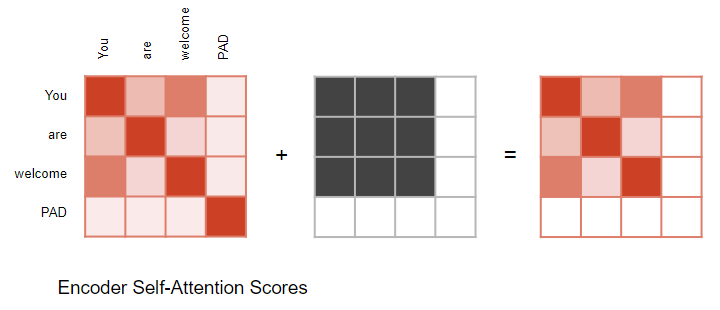

##### In the Decoder Self-attention:
masking serves to prevent the decoder from ‘peeking’ ahead at the rest of the target sentence when predicting the next word.
The Decoder processes words in the source sequence and uses them to predict the words in the destination sequence. During training, this is done via Teacher Forcing, where the complete target sequence is fed as Decoder inputs. Therefore, while predicting a word at a certain position, the Decoder has available to it the target words preceding that word as well as the target words following that word. This allows the Decoder to ‘cheat’ by using target words from future ‘time steps’.

#### Generate Output

The last Decoder in the stack passes its output to the Output component which converts it into the final output sentence.

The Linear layer projects the Decoder vector into Word Scores, with a score value for each unique word in the target vocabulary, at each position in the sentence. For instance, if our final output sentence has 7 words and the target Spanish vocabulary has 10000 unique words, we generate 10000 score values for each of those 7 words. The score values indicate the likelihood of occurrence for each word in the vocabulary in that position of the sentence.

The Softmax layer then turns those scores into probabilities (which add up to 1.0). In each position, we find the index for the word with the highest probability, and then map that index to the corresponding word in the vocabulary. Those words then form the output sequence of the Transformer.

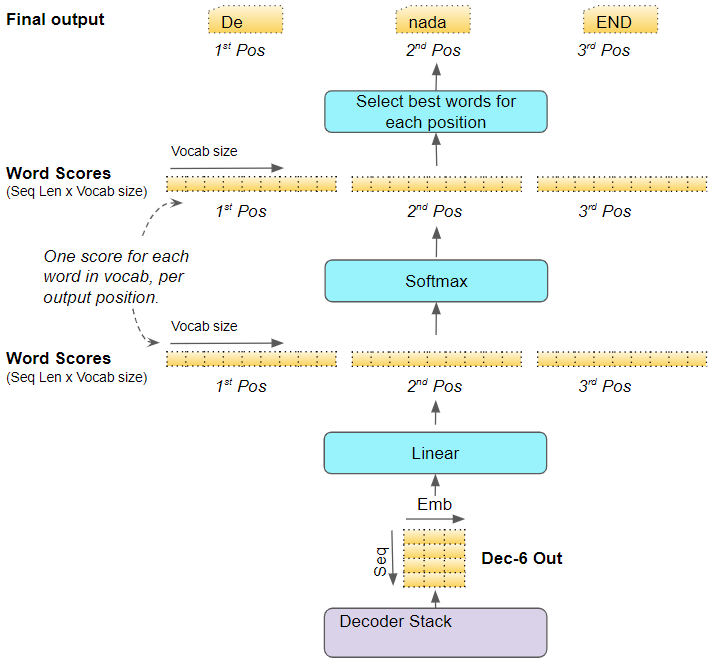

#### Training and Loss Function
During training, we use a loss function such as cross-entropy loss to compare the generated output probability distribution to the target sequence. The probability distribution gives the probability of each word occurring in that position.

## A Gentle Guide to the inner workings of Self-Attention, Encoder-Decoder Attention, Attention Score and Masking, in Plain English.

### How Attention is used in the Transformer
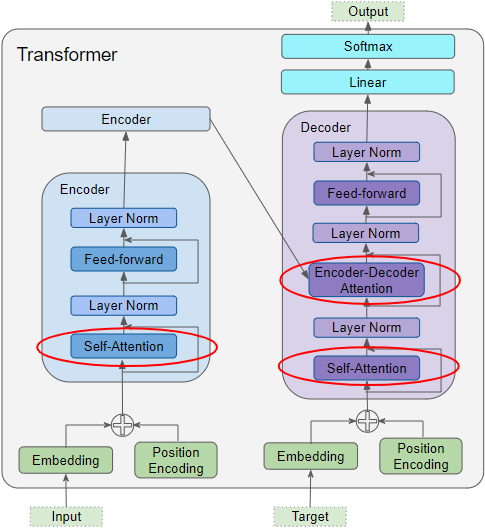

#### Attention Input Parameters — Query, Key, and Value
The Attention layer takes its input in the form of three parameters, known as the Query, Key, and Value.

All three parameters are similar in structure, with each word in the sequence represented by a vector.
1. Encoder Self-Attention
The input sequence is fed to the Input Embedding and Position Encoding, which produces an encoded representation for each word in the input sequence that captures the meaning and position of each word. This is fed to all three parameters, Query, Key, and Value in the Self-Attention in the first Encoder which then also produces an encoded representation for each word in the input sequence, that now incorporates the attention scores for each word as well. As this passes through all the Encoders in the stack, each Self-Attention module also adds its own attention scores into each word’s representation.

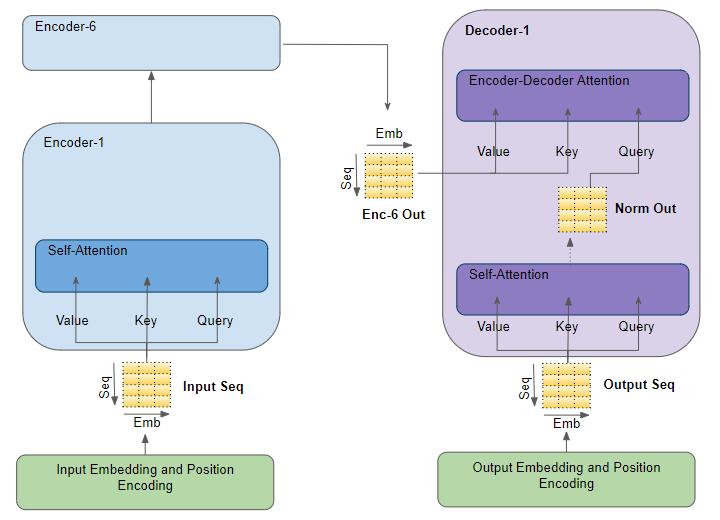

2. Decoder Self-Attention
Coming to the Decoder stack, the target sequence is fed to the Output Embedding and Position Encoding, which produces an encoded representation for each word in the target sequence that captures the meaning and position of each word. This is fed to all three parameters, Query, Key, and Value in the Self-Attention in the first Decoder which then also produces an encoded representation for each word in the target sequence, which now incorporates the attention scores for each word as well.

After passing through the Layer Norm, this is fed to the Query parameter in the Encoder-Decoder Attention in the first Decoder

2.1 . Encoder-Decoder Attention
Along with that, the output of the final Encoder in the stack is passed to the Value and Key parameters in the Encoder-Decoder Attention.

The Encoder-Decoder Attention is therefore getting a representation of both the target sequence (from the Decoder Self-Attention) and a representation of the input sequence (from the Encoder stack). It, therefore, produces a representation with the attention scores for each target sequence word that captures the influence of the attention scores from the input sequence as well.

As this passes through all the Decoders in the stack, each Self-Attention and each Encoder-Decoder Attention also add their own attention scores into each word’s representation.

#### Multiple Attention Heads
In the Transformer, the Attention module repeats its computations multiple times in parallel. Each of these is called an Attention Head. The Attention module splits its Query, Key, and Value parameters N-ways and passes each split independently through a separate Head. All of these similar Attention calculations are then combined together to produce a final Attention score. This is called Multi-head attention and gives the Transformer greater power to encode multiple relationships and nuances for each word.

##### Attention Hyperparameters
There are three hyperparameters that determine the data dimensions:

- Embedding Size — width of the embedding vector (we use a width of 6 in our example). This dimension is carried forward throughout the Transformer model and hence is sometimes referred to by other names like ‘model size’ etc.
- Query Size (equal to Key and Value size)— the size of the weights used by three Linear layers to produce the Query, Key, and Value matrices respectively (we use a Query size of 3 in our example)
- Number of Attention heads (we use 2 heads in our example)
- In addition, we also have the Batch size, giving us one dimension for the number of samples.

1. Input Layers
The Input Embedding and Position Encoding layers produce a matrix of shape (Number of Samples, Sequence Length, Embedding Size) which is fed to the Query, Key, and Value of the first Encoder in the stack.

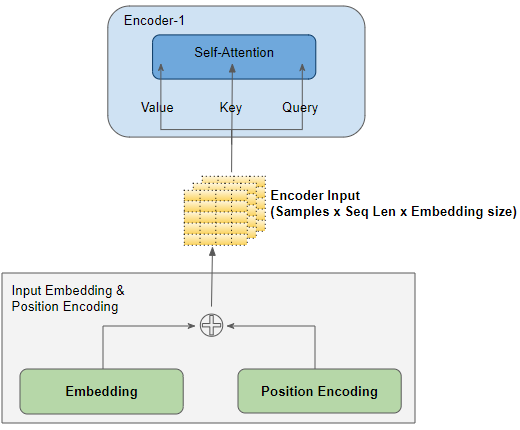

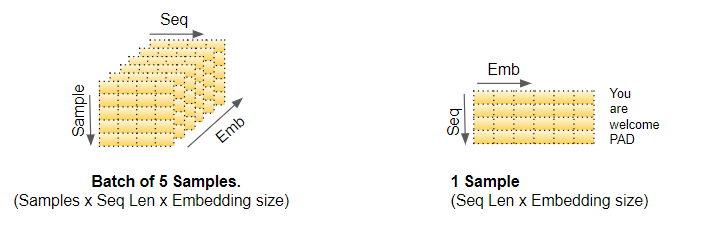

2. Linear Layers
There are three separate Linear layers for the Query, Key, and Value. Each Linear layer has its own weights. The input is passed through these Linear layers to produce the Q, K, and V matrices.

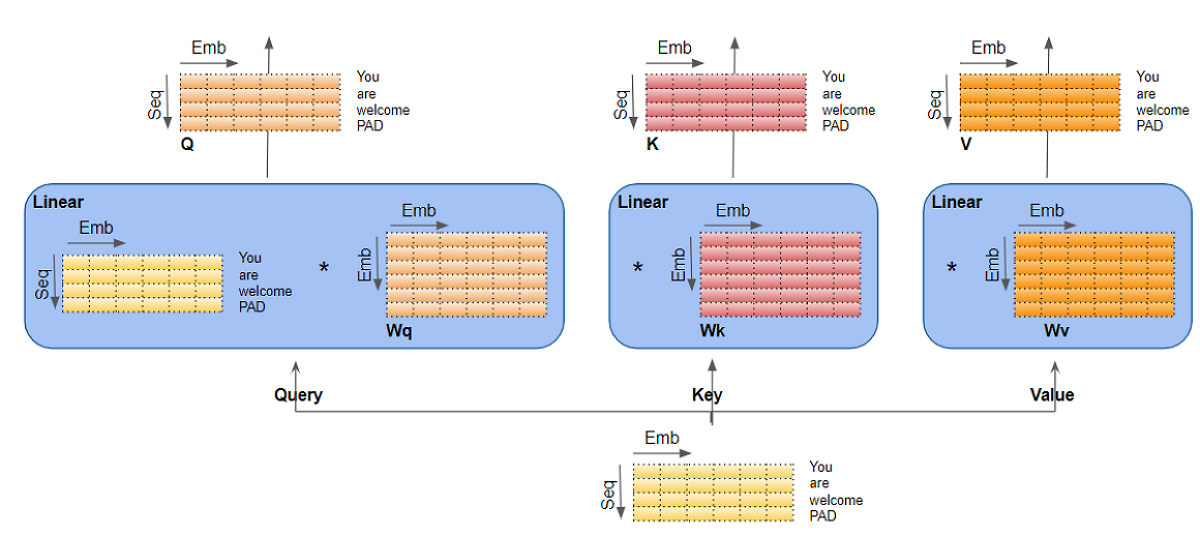

3. Splitting data across Attention heads
Now the data gets split across the multiple Attention heads so that each can process it independently.

However, the important thing to understand is that this is a logical split only. The Query, Key, and Value are not physically split into separate matrices, one for each Attention head. A single data matrix is used for the Query, Key, and Value, respectively, with logically separate sections of the matrix for each Attention head. Similarly, there are not separate Linear layers, one for each Attention head. All the Attention heads share the same Linear layer but simply operate on their ‘own’ logical section of the data matrix.

4. Linear layer weights are logically partitioned per head
This logical split is done by partitioning the input data as well as the Linear layer weights uniformly across the Attention heads. We can achieve this by choosing the Query Size as below:

Query Size = Embedding Size / Number of heads

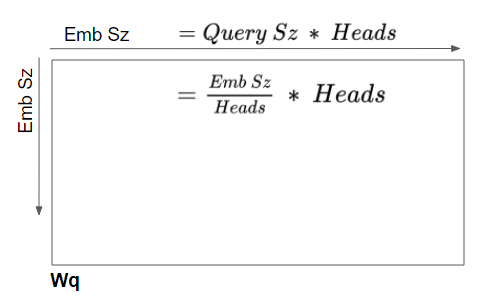

The computations for all Heads can be therefore be achieved via a single matrix operation rather than requiring N separate operations. This makes the computations more efficient and keeps the model simple because fewer Linear layers are required, while still achieving the power of the independent Attention heads.

5. Reshaping the Q, K, and V matrices

After splitting the data across Attention heads, the Q, K, and V matrices are reshaped to have the following shape: (Number of Samples, Sequence Length, Number of Attention Heads, Query Size)
The Q, K, and V matrices output by the Linear layers are reshaped to include an explicit Head dimension. Now each ‘slice’ corresponds to a matrix per head.

This matrix is reshaped again by swapping the Head and Sequence dimensions. Although the Batch dimension is not drawn, the dimensions of Q are now (Batch, Head, Sequence, Query size).

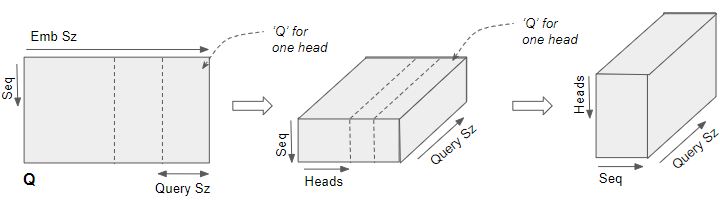

The final stage is for visualization only — although the Q matrix is a single matrix, we can think of it as a logically separate Q matrix per head.

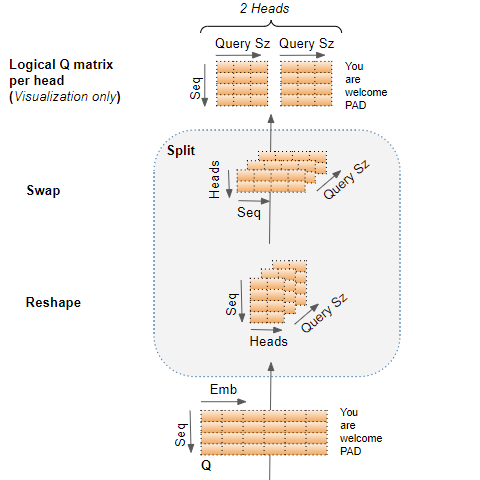

6. Compute the Attention Score for each head
We now have the 3 matrices, Q, K, and V, split across the heads. These are used to compute the Attention Score.

We will show the computations for a single head using just the last two dimensions (Sequence and Query size) and skip the first two dimensions (Batch and Head). Essentially, we can imagine that the computations we’re looking at are getting ‘repeated’ for each head and for each sample in the batch (although, obviously, they are happening as a single matrix operation, and not as a loop).

The first step is to do a matrix multiplication between Q and K.

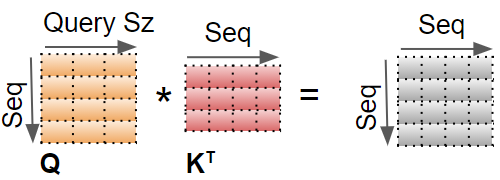

A Mask value is now added to the result. In the Encoder Self-attention, the mask is used to mask out the Padding values so that they don’t participate in the Attention Score.

Different masks are applied in the Decoder Self-attention and in the Decoder Encoder-Attention which we’ll come to a little later in the flow.

The result is now scaled by dividing by the square root of the Query size, and then a Softmax is applied to it.

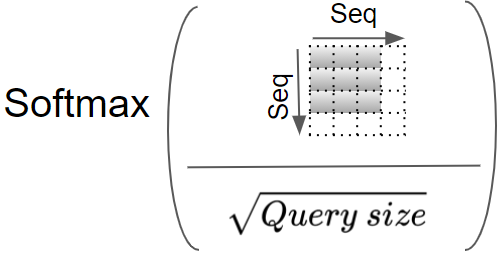

Another matrix multiplication is performed between the output of the Softmax and the V matrix.

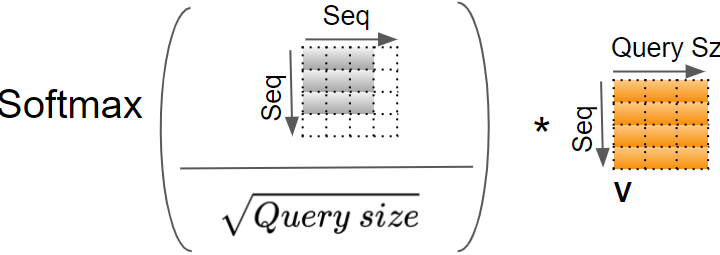

The complete Attention Score calculation in the Encoder Self-attention is as below:

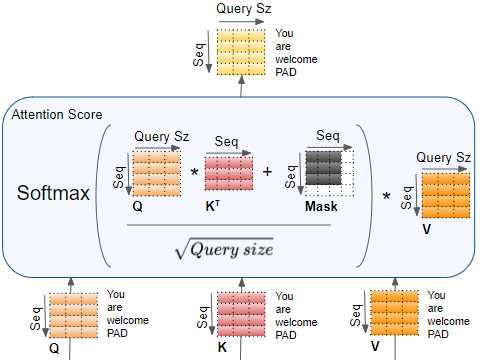

7. Merge each Head’s Attention Scores together

The final Attention Score matrix is then reshaped back to (Batch, Sequence Length, Embedding Size) and the computations are repeated for each head.
We now have separate Attention Scores for each head, which need to be combined together into a single score. This Merge operation is essentially the reverse of the Split operation.

It is done by simply reshaping the result matrix to eliminate the Head dimension. The steps are:

Reshape the Attention Score matrix by swapping the Head and Sequence dimensions. In other words, the matrix shape goes from (Batch, Head, Sequence, Query size) to (Batch, Sequence, Head, Query size).
Collapse the Head dimension by reshaping to (Batch, Sequence, Head * Query size). This effectively concatenates the Attention Score vectors for each head into a single merged Attention Score.
Since Embedding size =Head * Query size, the merged Score is (Batch, Sequence, Embedding size). In the picture below, we can see the complete process of merging for the example Score matrix.

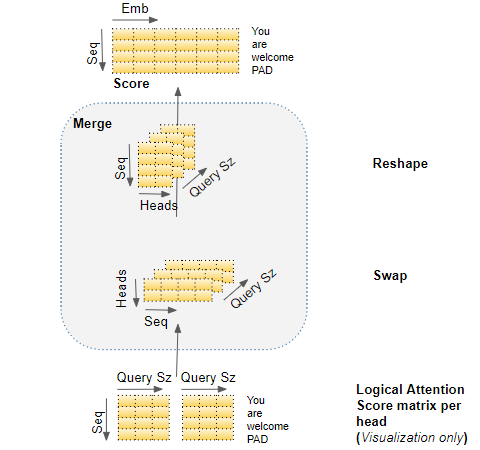

8. End-to-end Multi-head Attention
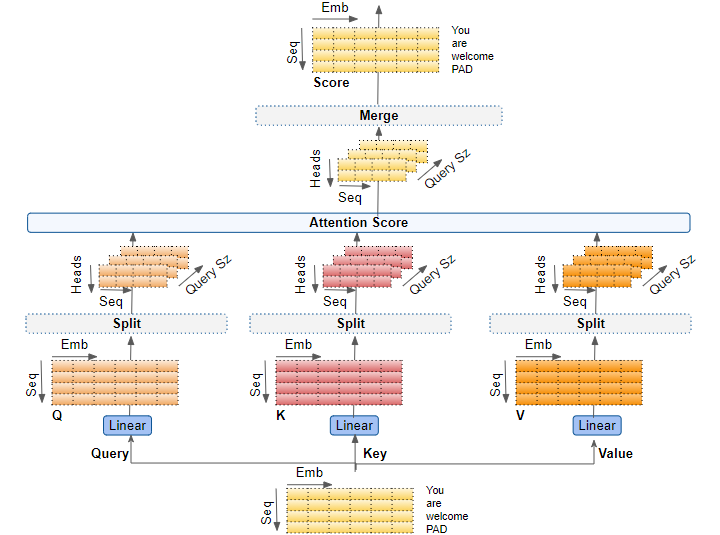

#### Multi-head split captures richer interpretations
An Embedding vector captures the meaning of a word. In the case of Multi-head Attention, as we have seen, the Embedding vectors for the input (and target) sequence gets logically split across multiple heads. What is the significance of this?
This means that separate sections of the Embedding can learn different aspects of the meanings of each word, as it relates to other words in the sequence. This allows the Transformer to capture richer interpretations of the sequence.
This may not be a realistic example, but it might help to build intuition. For instance, one section might capture the ‘gender-ness’ (male, female, neuter) of a noun while another might capture the ‘cardinality’ (singular vs plural) of a noun. This might be important during translation because, in many languages, the verb that needs to be used depends on these factors.

#### Decoder Self-Attention and Masking
The Decoder Self-Attention works just like the Encoder Self-Attention, except that it operates on each word of the target sequence.

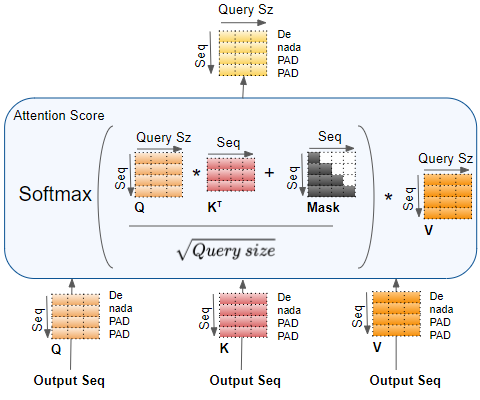


#### Decoder Encoder-Decoder Attention and Masking
The Encoder-Decoder Attention takes its input from two sources. Therefore, unlike the Encoder Self-Attention, which computes the interaction between each input word with other input words, and Decoder Self-Attention which computes the interaction between each target word with other target words, the Encoder-Decoder Attention computes the interaction between each target word with each input word.  